In [245]:
import geopandas as gpd
import pandas as pd

In [110]:
arhangelskaya_oblast = gpd.read_file('data/arhangelskaya_oblast.geojson')
data = arhangelskaya_oblast

In [111]:
data

,region,id_full,level,type,name,id,geometry
0,Архангельская область,3,2,Область,Архангельская,144105,"MULTIPOLYGON (((6752340.851 16757142.533, 6747..."


<AxesSubplot:>

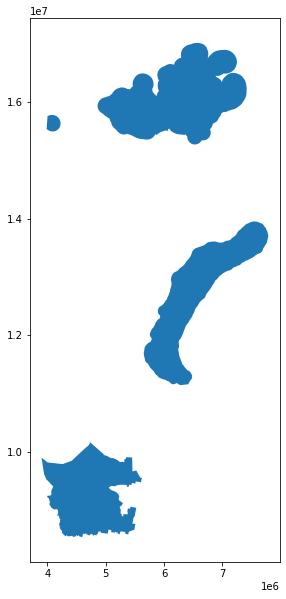

In [112]:
data.plot(figsize=(10,10))